In [2]:
pip install tensorflow matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [4]:
# Step 1: Define your actual data paths
chic_train_dir = 'dataset/train/chic_train'  # Path for chicken egg training images
duck_train_dir = 'dataset/train/duck_train'  # Path for duck egg training images
chic_test_dir = 'dataset/test/chic_test'     # Path for chicken egg testing images
duck_test_dir = 'dataset/test/duck_test'     # Path for duck egg testing images


In [5]:
def load_and_preprocess_images(train_folder, test_folder, img_size=(150, 150)):
    def load_from_folder(folder, label):
        images = []
        labels = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0  # Normalize the image
                images.append(img)
                labels.append(label)
        return images, labels
    
    train_images, train_labels = load_from_folder(train_folder, 1)  # Label 1 for chicken
    test_images, test_labels = load_from_folder(test_folder, 0)    # Label 0 for duck
    
    return np.array(train_images), np.array(train_labels), np.array(test_images), np.array(test_labels)


In [7]:
# Load training and testing images
train_images_chic, train_labels_chic, test_images_chic, test_labels_chic = load_and_preprocess_images(chic_train_dir, chic_test_dir)
train_images_duck, train_labels_duck, test_images_duck, test_labels_duck = load_and_preprocess_images(duck_train_dir, duck_test_dir)

# Combine chicken and duck images and labels
train_images = np.concatenate((train_images_chic, train_images_duck))
train_labels = np.concatenate((train_labels_chic, train_labels_duck))
test_images = np.concatenate((test_images_chic, test_images_duck))
test_labels = np.concatenate((test_labels_chic, test_labels_duck))

Number of chicken egg training images: 2564
Number of duck egg training images: 2862
Number of chicken egg testing images: 1408
Number of duck egg testing images: 1620
Displaying first 5 training images of chicken eggs:


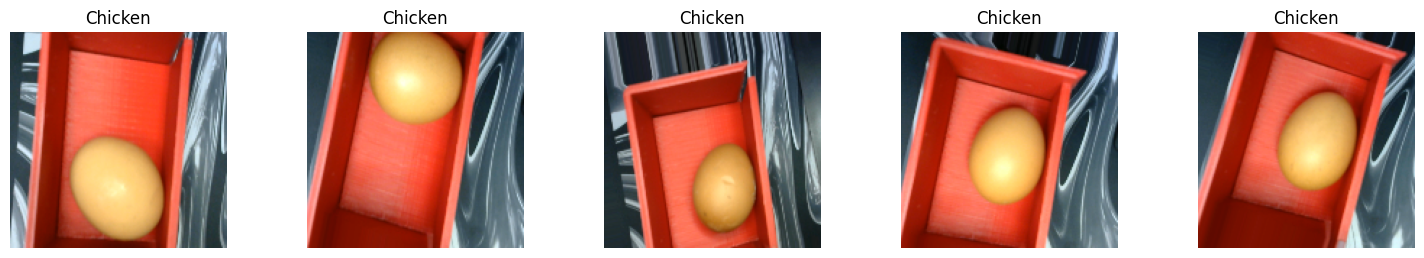

Displaying first 5 training images of duck eggs:


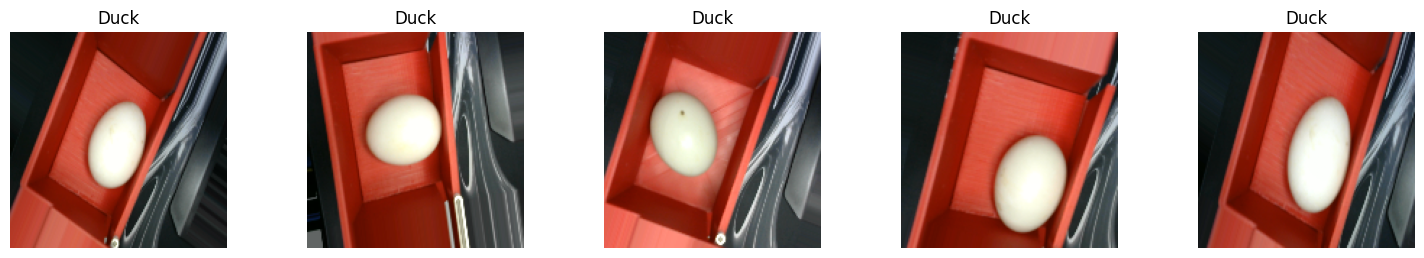

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Define your actual data paths
chic_train_dir = 'dataset/train/chic_train'  # Path for chicken egg training images
duck_train_dir = 'dataset/train/duck_train'  # Path for duck egg training images
chic_test_dir = 'dataset/test/chic_test'     # Path for chicken egg testing images
duck_test_dir = 'dataset/test/duck_test'     # Path for duck egg testing images

# Step 2: Load and preprocess images
def load_and_preprocess_images(train_folder, test_folder, label, img_size=(150, 150)):
    def load_from_folder(folder):
        images = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0  # Normalize the image
                images.append(img)
        return images
    
    train_images = load_from_folder(train_folder)  # Load images without labels
    test_images = load_from_folder(test_folder)
    
    # Create labels based on the input parameter
    train_labels = np.full(len(train_images), label)  # Fill array with the specified label
    test_labels = np.full(len(test_images), 0 if label == 1 else 1)  # Opposite label for test images
    
    return np.array(train_images), train_labels, np.array(test_images), test_labels

# Load training and testing images
train_images_chic, train_labels_chic, test_images_chic, test_labels_chic = load_and_preprocess_images(chic_train_dir, chic_test_dir, label=1)
train_images_duck, train_labels_duck, test_images_duck, test_labels_duck = load_and_preprocess_images(duck_train_dir, duck_test_dir, label=0)

# Display the number of images found
print(f'Number of chicken egg training images: {len(train_images_chic)}')
print(f'Number of duck egg training images: {len(train_images_duck)}')
print(f'Number of chicken egg testing images: {len(test_images_chic)}')
print(f'Number of duck egg testing images: {len(test_images_duck)}')

# Function to display sample images
def display_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])  # Show the image in its original color
        plt.title('Chicken' if labels[i] == 1 else 'Duck')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display samples from training data
print("Displaying first 5 training images of chicken eggs:")
display_sample_images(train_images_chic, train_labels_chic, num_samples=5)  # Show 5 chicken eggs
print("Displaying first 5 training images of duck eggs:")
display_sample_images(train_images_duck, train_labels_duck, num_samples=5)    # Show 5 duck eggs

In [9]:
from tensorflow.keras.layers import Input

# Step 5: Build the Model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Use Input layer to specify the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 6: Train the Model
history = model.fit(np.concatenate((train_images_chic, train_images_duck)),
                    np.concatenate((train_labels_chic, train_labels_duck)),
                    epochs=10,
                    validation_data=(np.concatenate((test_images_chic, test_images_duck)),
                                     np.concatenate((test_labels_chic, test_labels_duck))),
                    verbose=1)

# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(np.concatenate((test_images_chic, test_images_duck)),
                                      np.concatenate((test_labels_chic, test_labels_duck)),
                                      verbose=1)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 93s 525ms/step - accuracy: 0.8610 - loss: 0.3043 - val_accuracy: 0.0000e+00 - val_loss: 16.8489
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 82s 485ms/step - accuracy: 1.0000 - loss: 1.9901e-04 - val_accuracy: 0.0000e+00 - val_loss: 24.4321
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 82s 485ms/step - accuracy: 1.0000 - loss: 1.2861e-04 - val_accuracy: 3.3025e-04 - val_loss: 27.0532
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 81s 478ms/step - accuracy: 0.9893 - loss: 0.0406 - val_accuracy: 0.0000e+00 - val_loss: 26.0873
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 80s 468ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 6.6050e-04 - val_loss: 36.8395
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 80s 468ms/step - accuracy: 0.9982 - loss: 0.0033 - val_accuracy: 0.0000e+00 - val_loss: 47.3556
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 80s 472ms/step - accuracy: 1.0000 - loss: 9.8147e-05 - val_accuracy: 0.0000e+00 - val_loss: 44.6772
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━

In [12]:
# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img_array = np.expand_dims(img, axis=0)

    prediction = model.predict(img_array)
    return 'Duck' if prediction[0] < 0.5 else 'Chicken'

# Example usage for prediction
print(predict_image('dataset/test/chic_test/aug_0_10.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Chicken


In [13]:
# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img_array = np.expand_dims(img, axis=0)

    prediction = model.predict(img_array)
    return 'Duck' if prediction[0] < 0.5 else 'Chicken'

# Example usage for prediction
print(predict_image('dataset/test/chic_test/aug_0_1005.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Chicken


In [14]:
# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img_array = np.expand_dims(img, axis=0)

    prediction = model.predict(img_array)
    return 'Duck' if prediction[0] < 0.5 else 'Chicken'

# Example usage for prediction
print(predict_image('dataset/test/duck_test/aug_0_1003.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Duck


In [15]:


# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img_array = np.expand_dims(img, axis=0)

    prediction = model.predict(img_array)
    return 'Duck' if prediction[0] < 0.5 else 'Chicken'

# Example usage for prediction
print(predict_image('dataset/test/duck_test/aug_0_1005.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Duck


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


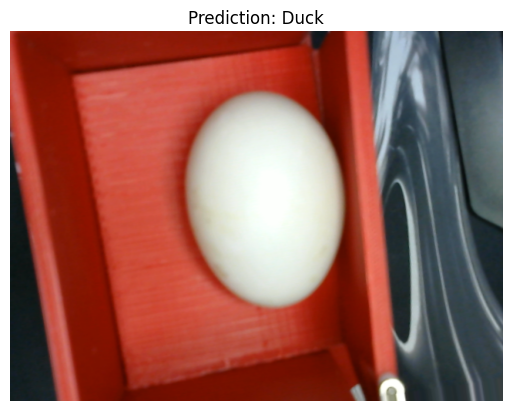

Duck


In [16]:
import matplotlib.pyplot as plt

# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img_rgb, (150, 150))
    img_normalized = img_resized.astype('float32') / 255.0
    img_array = np.expand_dims(img_normalized, axis=0)

    prediction = model.predict(img_array)
    label = 'Duck' if prediction[0] < 0.5 else 'Chicken'

    # Display the original image
    plt.imshow(img_rgb)  # Display the original image in RGB
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

    return label

# Example usage for prediction
print(predict_image('dataset/test/duck_test/aug_0_1005.png'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


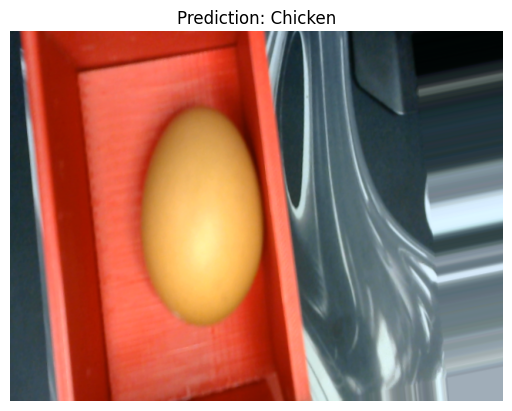

Chicken


In [33]:
import matplotlib.pyplot as plt

# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img_rgb, (150, 150))
    img_normalized = img_resized.astype('float32') / 255.0
    img_array = np.expand_dims(img_normalized, axis=0)

    prediction = model.predict(img_array)
    label = 'Duck' if prediction[0] < 0.5 else 'Chicken'

    # Display the original image
    plt.imshow(img_rgb)  # Display the original image in RGB
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

    return label

# Example usage for prediction
print(predict_image('dataset/test/chic_test/aug_0_1005.png'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


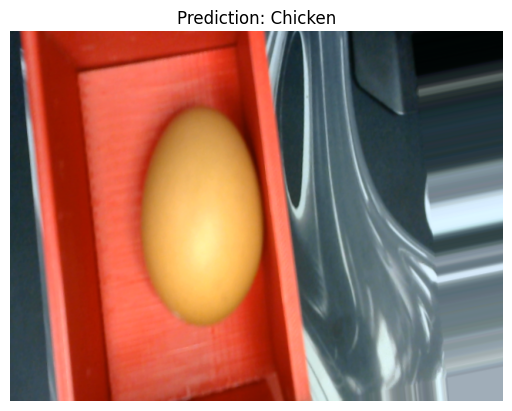

Chicken


In [17]:
import matplotlib.pyplot as plt

# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img_rgb, (150, 150))
    img_normalized = img_resized.astype('float32') / 255.0
    img_array = np.expand_dims(img_normalized, axis=0)

    prediction = model.predict(img_array)
    label = 'Duck' if prediction[0] < 0.5 else 'Chicken'

    # Display the original image
    plt.imshow(img_rgb)  # Display the original image in RGB
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

    return label

# Example usage for prediction
print(predict_image('dataset/test/chic_test/aug_0_1005.png'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


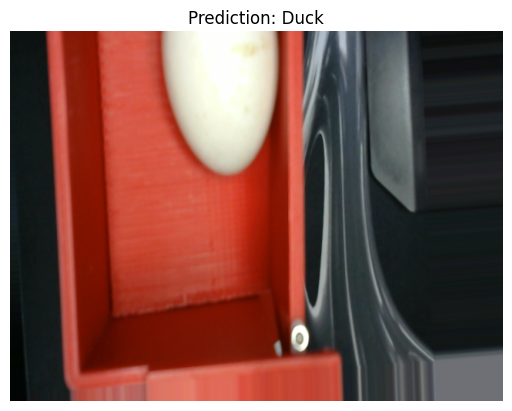

Duck


In [18]:


import matplotlib.pyplot as plt

# Step 7: Make Predictions
def predict_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img_rgb, (150, 150))
    img_normalized = img_resized.astype('float32') / 255.0
    img_array = np.expand_dims(img_normalized, axis=0)

    prediction = model.predict(img_array)
    label = 'Duck' if prediction[0] < 0.5 else 'Chicken'

    # Display the original image
    plt.imshow(img_rgb)  # Display the original image in RGB
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

    return label

# Example usage for prediction
print(predict_image('dataset/test/duck_test/aug_0_1018.png'))


In [20]:
# Save the model
model.save('my_model.keras')



In [22]:
# Later, to load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


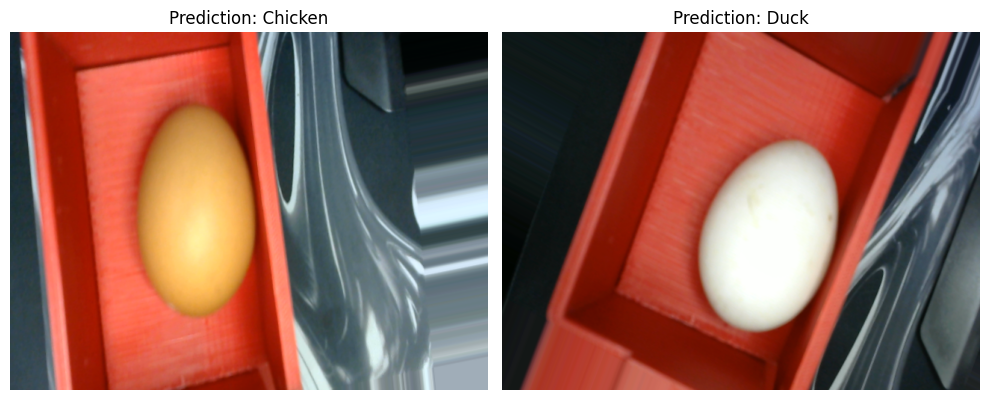

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.keras')

def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img_array = np.expand_dims(img, axis=0)

    prediction = model.predict(img_array)
    return 'Duck' if prediction[0] < 0.5 else 'Chicken'

def display_images(image_path1, image_path2):
    prediction1 = predict_image(image_path1)
    prediction2 = predict_image(image_path2)

    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(f'Prediction: {prediction1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(f'Prediction: {prediction2}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage for prediction and display
display_images('dataset/test/chic_test/aug_0_1005.png', 'dataset/test/duck_test/aug_0_1003.png')
